In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2.typing import MatLike
from filters import *

In [110]:
def read_image(path:str) -> MatLike:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return image

def plot_image(image:MatLike, name:str):
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()

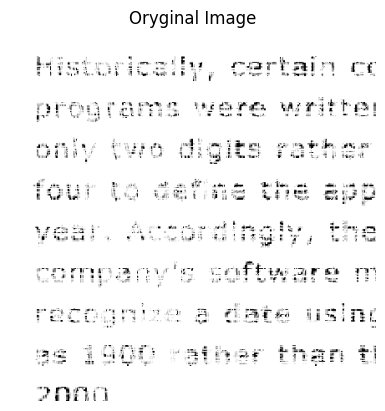

In [111]:
# Wczytanie obrazu
image = read_image("/home/michal/University/piao_mgr/cw3/letters.png")
# Wyświetlenie obrazu
plot_image(image, "Oryginal Image")

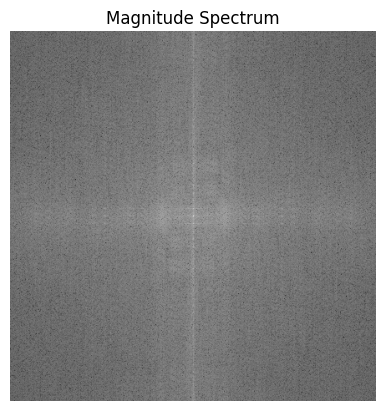

In [112]:
# Dyskretna transformaty Fouriera (DFT)
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)
# Wyświetlenie widma częstotliwościowego
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

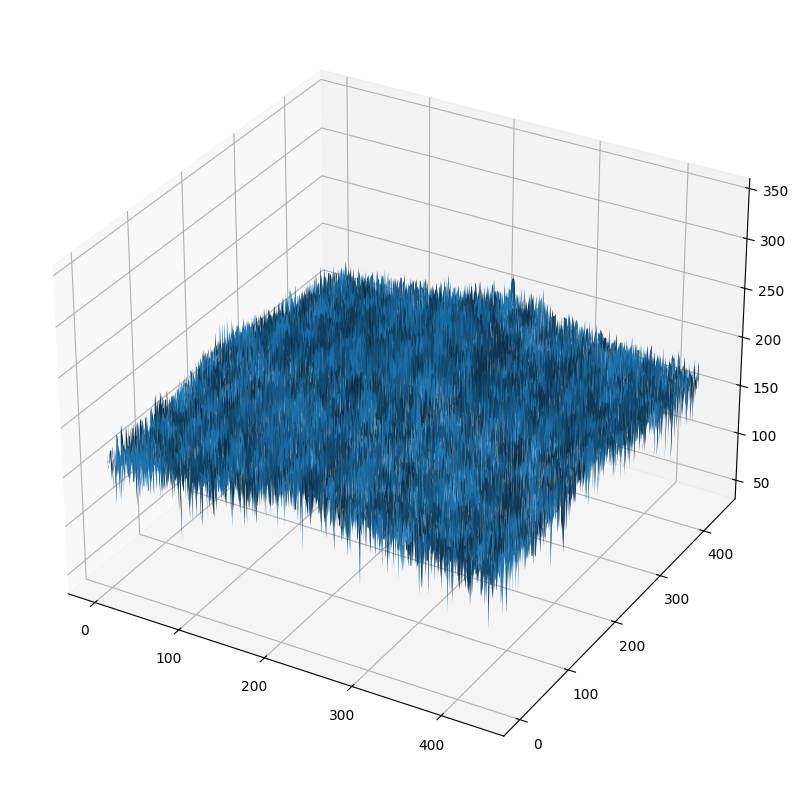

In [113]:
plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')

y = range( magnitude_spectrum.shape[0] )
x = range( magnitude_spectrum.shape[1] ) 
X, Y = np.meshgrid(x, y)

ax.plot_surface( X, Y, magnitude_spectrum[:,:] )

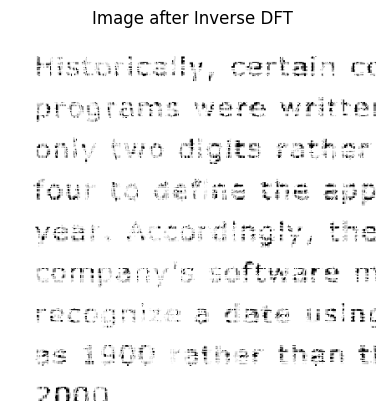

In [114]:
# Odwrócenie transformaty Fouriera
f_ishift = np.fft.ifftshift(dft_shift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
# Wyświetlenie obrazu po odwróceniu DFT
plt.imshow(img_back, cmap='gray')
plt.title('Image after Inverse DFT')
plt.axis('off')
plt.show()

Text(0.5, 0.92, 'High-pass filter')

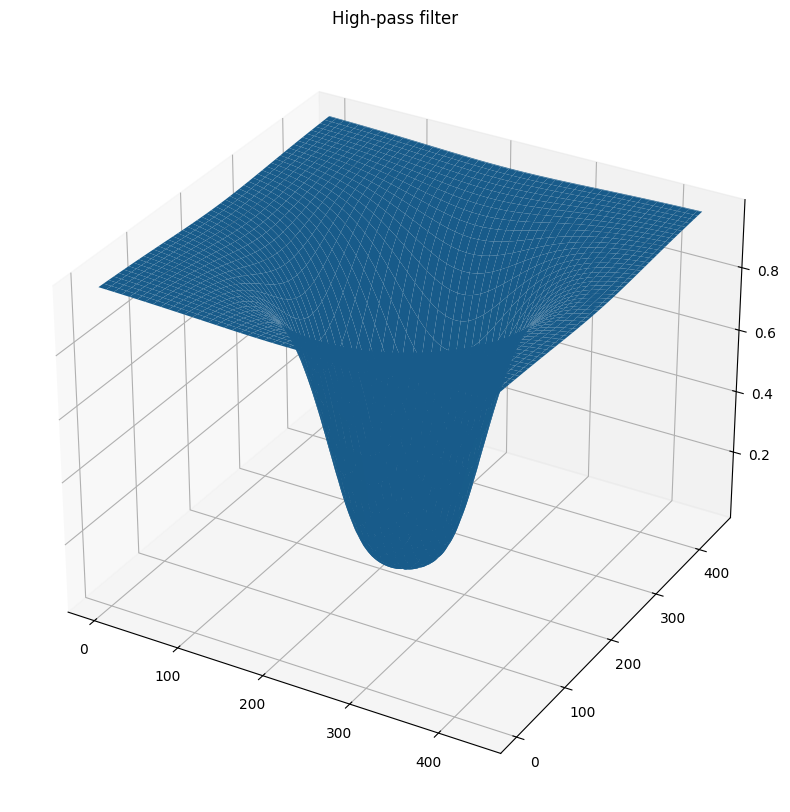

In [115]:
# Tworzenie maski
mask = butterworth_high_pass_filter(image, 8000, 1)
# mask = low_pass_filter(image, 80)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

y = range( mask.shape[0] )
x = range( mask.shape[1] ) 
X, Y = np.meshgrid(x, y)

ax.plot_surface( X, Y, mask[:,:] )
ax.set_title("High-pass filter")


In [116]:
# Filtracja w dziedzinie częstotliwości
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

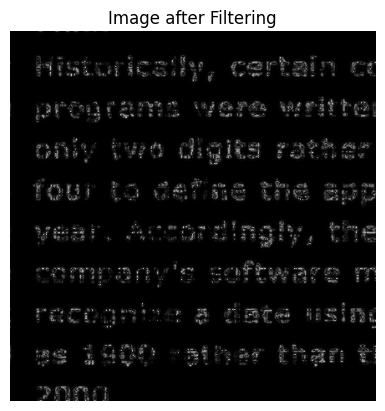

In [117]:
# Wyświetlenie obrazu po filtracji
plt.imshow(img_filtered, cmap='gray')
plt.title('Image after Filtering')
plt.axis('off')
plt.show()

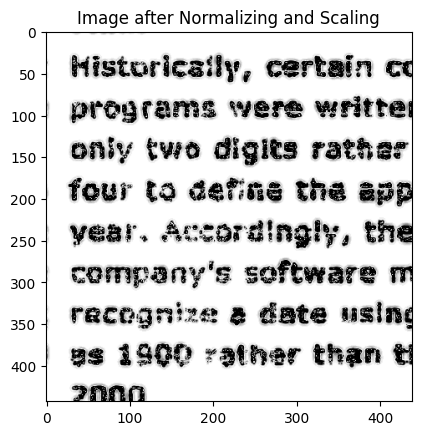

In [122]:
cv2.imwrite("tmp_img.png", img_filtered)
img_filtered = cv2.imread("tmp_img.png")
stretched_image = cv2.normalize(img_filtered, None, 0, 200, cv2.NORM_MINMAX)
stretched_image = cv2.multiply(stretched_image,15)

stretched_image = cv2.bitwise_not(stretched_image)
plt.title('Image after Normalizing and Scaling')
plt.imshow(stretched_image, cmap='gray')

Text(0.5, 1.0, 'Text after treshold process')

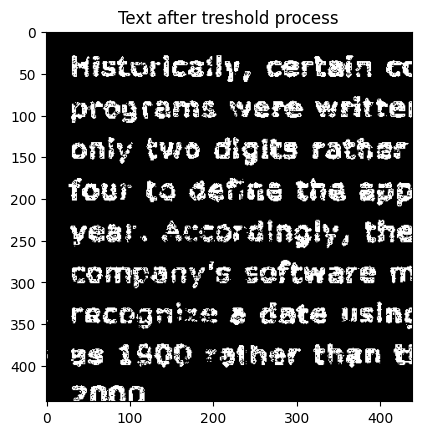

In [123]:
__, text = cv2.threshold(stretched_image, 130, 255, cv2.THRESH_BINARY)
text = cv2.bitwise_not(text)
plt.imshow(text, cmap='gray')
plt.title("Text after treshold process")

In [120]:
size = np.size(text)
skel = np.zeros(text.shape,np.uint8)
 
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

Text(0.5, 1.0, 'Text after closing process')

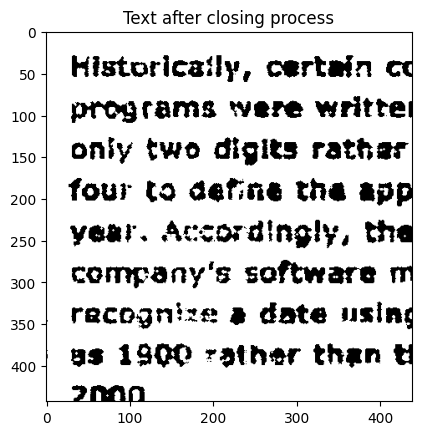

In [124]:
mask_value = 9
dilated = cv2.dilate(text,element,np.ones((mask_value,mask_value)))
eroded = cv2.erode(dilated,element,np.ones((mask_value,mask_value)))

text = eroded
text = cv2.bitwise_not(text)
plt.imshow(text, cmap='gray')
plt.title("Text after closing process")